# Accessibility relations

How to fetch `graph` and calculate `accessibility_matrix` using our `IduEdu` wrappers.

In [37]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry']]
blocks_gdf.head()

,geometry
id,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6..."
1,"POLYGON ((355412.142 6623378.149, 355411.7 662..."
2,"POLYGON ((353934.329 6625429.433, 353923.453 6..."
3,"POLYGON ((355099.099 6623847.765, 355074.808 6..."
4,"POLYGON ((352766.168 6621954.748, 352744.412 6..."


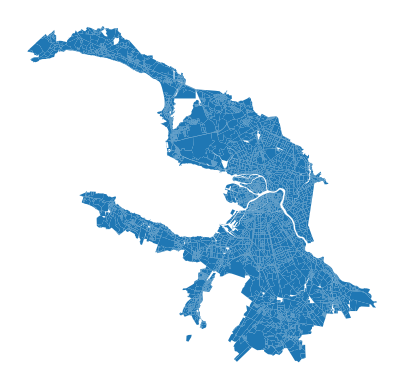

In [38]:
blocks_gdf.plot().set_axis_off()

## Intermodal graph

In [39]:
from blocksnet.relations.accessibility import get_accessibility_graph

graph = get_accessibility_graph(blocks_gdf, 'intermodal')

2025-03-31 03:35:10.269 | WARNING  | blocksnet.relations.accessibility.graph:get_accessibility_graph:14 - CRS do not match IDUEDU required crs. Reprojecting.
2025-03-31 03:35:12.532 | INFO     | iduedu.modules.drive_walk_builder:get_walk_graph:216 - Downloading walk graph from OSM, it may take a while for large territory ...


Parsing public transport routes:   0%|          | 0/1244 [00:00<?, ?it/s]

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/shapely/linear.py:88: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)


Calculating the weights of the walk graph:   0%|          | 0/1182502 [00:00<?, ?it/s]

2025-03-31 03:42:34.145 | INFO     | iduedu.modules.pt_walk_joiner:join_pt_walk_graph:50 - Composing intermodal graph...
2025-03-31 03:43:42.413 | WARNING  | iduedu.modules.pt_walk_joiner:join_pt_walk_graph:179 - Weakly connected components detected. 2 graph islands were removed. These are probably pt routes that are not connected to walking routes. You may try adjusting the max_dist parameter, but this can lead to incorrect data.


## Accessibility matrix

In [40]:
from blocksnet.relations.accessibility import calculate_accessibility_matrix

acc_mx = calculate_accessibility_matrix(blocks_gdf, graph)

In [41]:
acc_mx.head()

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


id,0,1,2,3,4,5,6,7,8,9,...,16310,16311,16312,16313,16314,16315,16316,16317,16318,16319
id,,,,,,,,,,,,,,,,,,,,,
0,0.000000,18.953125,10.507812,16.937500,30.359375,29.281250,31.625000,23.609375,80.8750,84.5625,...,79.6250,103.9375,99.2500,136.2500,131.875,132.6250,245.250,230.750,241.375,124.8125
1,18.234375,0.000000,19.000000,8.156250,20.406250,24.968750,26.328125,16.171875,79.3750,83.0625,...,78.1250,102.5000,97.6875,134.8750,130.375,131.0000,243.875,229.250,239.875,112.8750
2,10.507812,20.875000,0.000000,20.421875,27.781250,26.703125,29.046875,21.031250,71.8125,75.5000,...,70.5625,94.9375,90.1250,127.1875,122.875,123.5625,236.250,221.625,232.250,124.6875
3,16.562500,8.445312,18.984375,0.000000,21.781250,27.515625,29.296875,17.562500,79.3750,83.0000,...,78.1250,102.4375,97.6875,134.7500,130.375,131.1250,243.875,229.250,239.875,114.3125
4,31.968750,19.890625,31.421875,21.468750,0.000000,23.828125,23.812500,15.945312,91.8125,95.4375,...,90.5625,114.8750,110.1250,147.1250,142.875,143.5000,256.250,241.750,252.375,109.3125
